In [1]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv("train_ctrUa4K.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

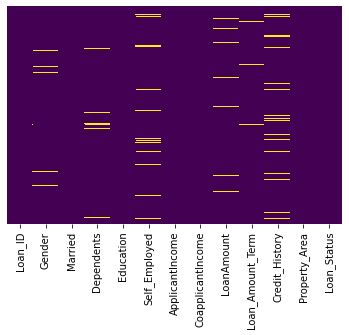

In [7]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot:xlabel='Gender', ylabel='count'>

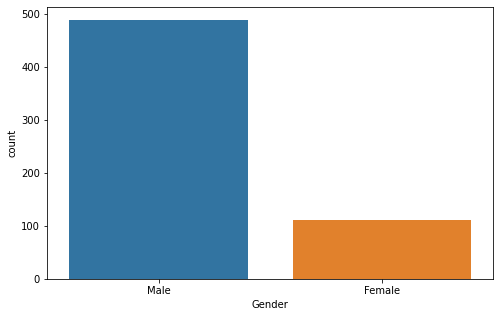

In [8]:
plt.figure(figsize=(8,5))
sns.countplot('Gender',data=data)

In [9]:
data['Gender']= data['Gender'].fillna(data['Gender'].mode()[0])

In [10]:
data['Gender'].isnull().sum()

0

<AxesSubplot:xlabel='Dependents', ylabel='count'>

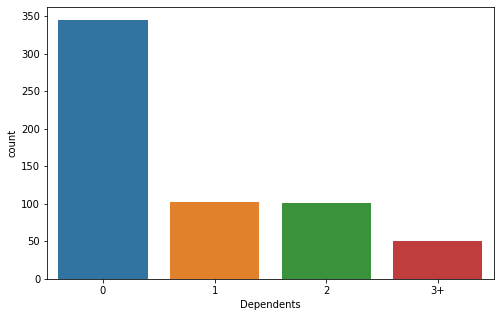

In [11]:
plt.figure(figsize=(8,5))
sns.countplot('Dependents',data=data)

In [12]:
data['Dependents'] = data['Dependents'].replace("3+", 3)

In [13]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [14]:
data['Dependents'] = data['Dependents'].astype('int64')

In [15]:
data['Dependents'].isnull().sum()

0

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

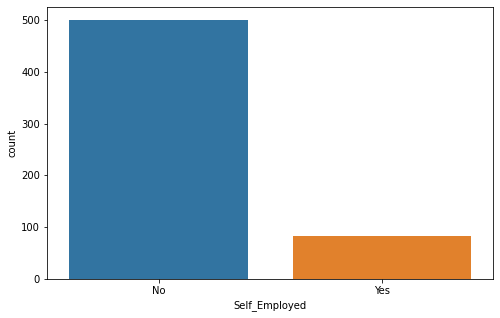

In [16]:
plt.figure(figsize=(8,5))
sns.countplot('Self_Employed',data=data)

In [17]:
data['Self_Employed']= data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Self_Employed'].isnull().sum()

0

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<AxesSubplot:xlabel='LoanAmount'>

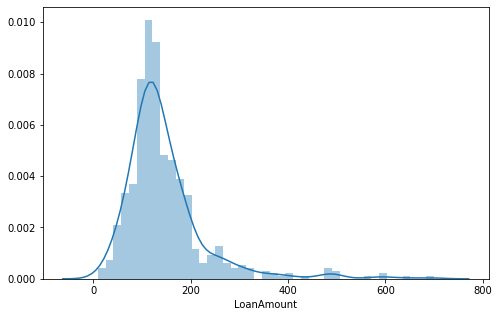

In [18]:
plt.figure(figsize=(8,5))
sns.distplot(data['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount'>

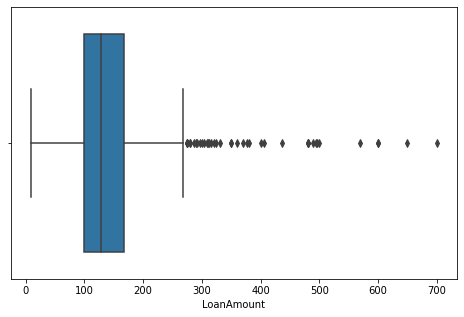

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot('LoanAmount',data=data)

In [20]:
max_threshold = data['LoanAmount'].quantile(0.95)
max_threshold

297.7999999999997

In [21]:
data['LoanAmount']= data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['LoanAmount'].isnull().sum()

0

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

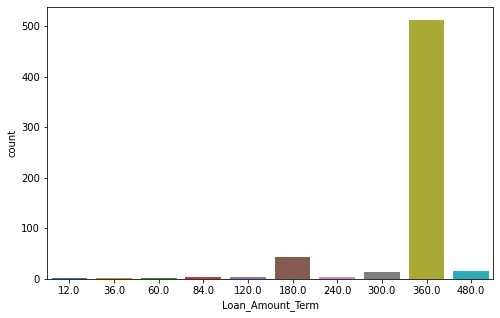

In [22]:
plt.figure(figsize=(8,5))
sns.countplot('Loan_Amount_Term',data=data)

In [23]:
data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Loan_Amount_Term'].isnull().sum()

0

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

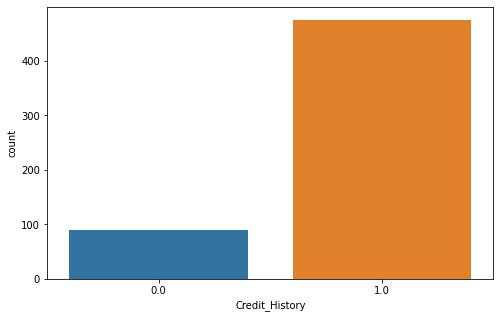

In [24]:
plt.figure(figsize=(8,5))
sns.countplot('Credit_History',data = data)

In [25]:
data['Credit_History']= data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Credit_History'].isnull().sum()

0

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

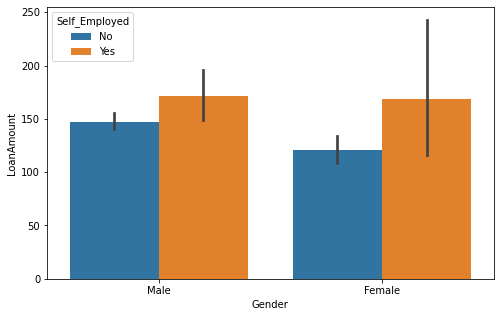

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='Gender',y='LoanAmount',hue='Self_Employed',data=data)

<AxesSubplot:>

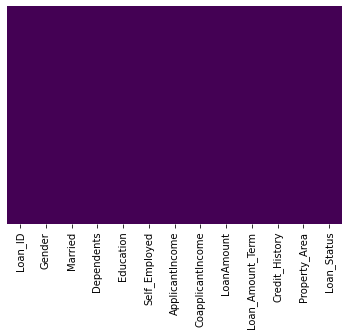

In [27]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap="viridis")

In [28]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [29]:
data = pd.get_dummies(data, columns=['Gender','Married','Education','Self_Employed','Property_Area'])

In [30]:
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,146.412162,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.000000,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,2583,2358.0,120.000000,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,6000,0.0,141.000000,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1


In [31]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data['Loan_Status'] = LE.fit_transform(data['Loan_Status'])

In [32]:
data = data.drop(['Loan_ID'],axis = 1)

In [33]:
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.412162,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1


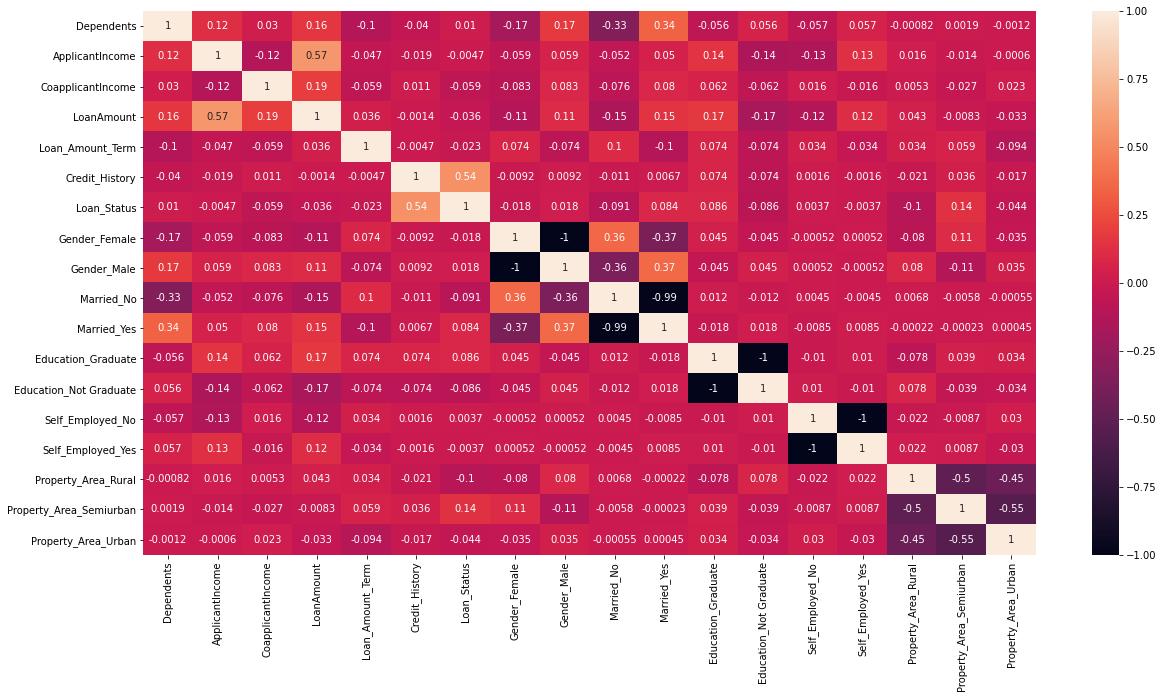

In [34]:
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True)
plt.show()

In [35]:
data = data.drop(['Gender_Female','Married_Yes','Education_Not Graduate','Self_Employed_No'],axis = 1)

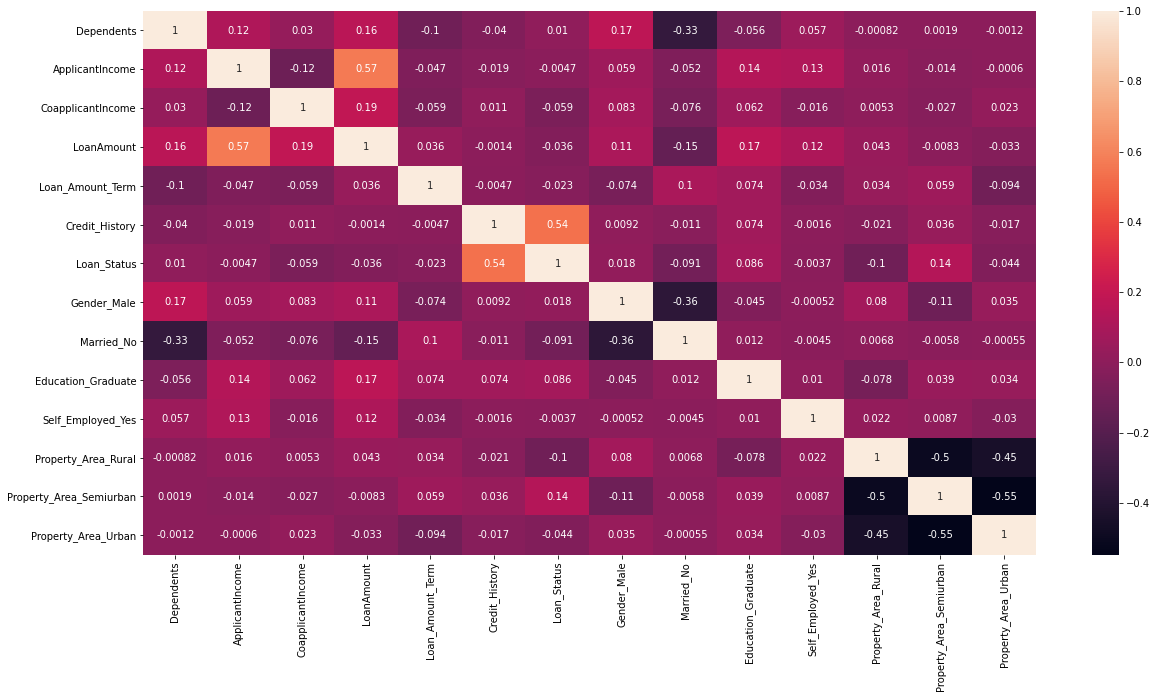

In [36]:
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True)
plt.show()

In [37]:
X = data.drop(['Loan_Status'],axis = 1)
y = data['Loan_Status']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [43]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print('accuracy is',XGB_SC)

             precision    recall  f1-score   support

          0       0.72      0.44      0.55        52
          1       0.76      0.91      0.83       102

avg / total       0.75      0.75      0.73       154

accuracy is 0.7532467532467533


D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [44]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',LR_SC)

             precision    recall  f1-score   support

          0       0.95      0.35      0.51        52
          1       0.75      0.99      0.85       102

avg / total       0.82      0.77      0.74       154

accuracy is 0.7727272727272727
